# NetFlix Stock Data Analysis

In [4]:
# Depedencies
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the warning
from warnings import filterwarnings
filterwarnings("ignore")

In [8]:
# Download dataset
path = kagglehub.dataset_download(
    "zongaobian/netflix-stock-data-and-key-affiliated-companies",
)

print("Path to dataset files: ",path)

100%|██████████| 2.34M/2.34M [00:00<00:00, 6.22MB/s]

Extracting files...
Path to dataset files:  /Users/steveyuan/.cache/kagglehub/datasets/zongaobian/netflix-stock-data-and-key-affiliated-companies/versions/3


In [9]:
# Copy files into current work file
import os
import shutil

for file_name in os.listdir(path):
    full_file_path = os.path.join(path, file_name)
    if os.path.isfile(full_file_path):
        shutil.copy(full_file_path, ".")  # . means current folder

# Analysis Netflix Stock

In [11]:
# Load the csv file
netflix_file_path = "./NFLX_daily_data.csv"

netflix_df = pd.read_csv(netflix_file_path, encoding="utf-8")

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5670 non-null   object 
 1   Open       5670 non-null   float64
 2   High       5670 non-null   float64
 3   Low        5670 non-null   float64
 4   Close      5670 non-null   float64
 5   Adj Close  5670 non-null   float64
 6   Volume     5670 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 310.2+ KB


In [13]:
# check nan value
netflix_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
# covert date format into datetime
netflix_df["Date"] = pd.to_datetime(netflix_df["Date"])

# display the result
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5670 non-null   datetime64[ns]
 1   Open       5670 non-null   float64       
 2   High       5670 non-null   float64       
 3   Low        5670 non-null   float64       
 4   Close      5670 non-null   float64       
 5   Adj Close  5670 non-null   float64       
 6   Volume     5670 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 310.2 KB


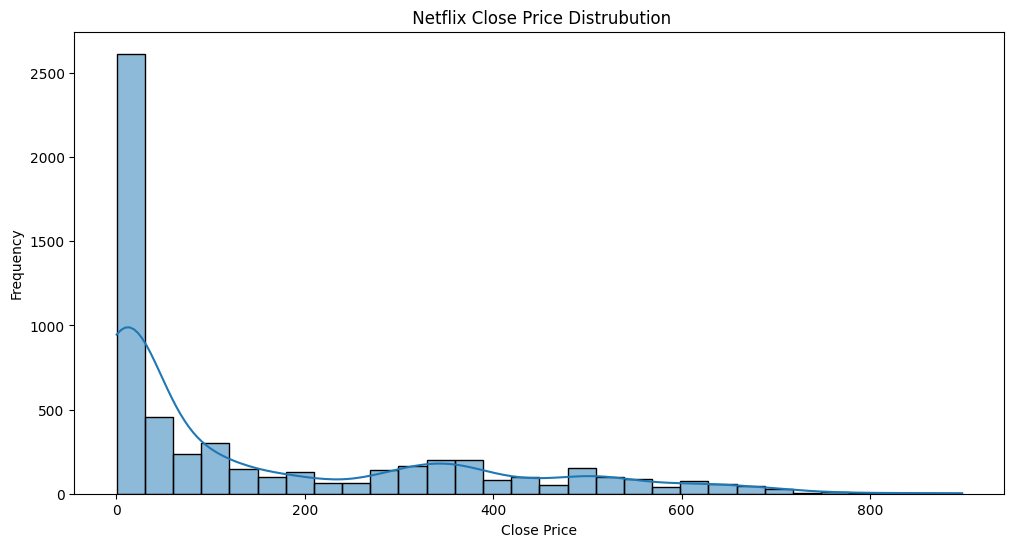

In [22]:
# Distrubution of close price
plt.figure(figsize=(12, 6))
sns.histplot(netflix_df["Close"], kde=True, bins=30)
plt.title(" Netflix Close Price Distrubution")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

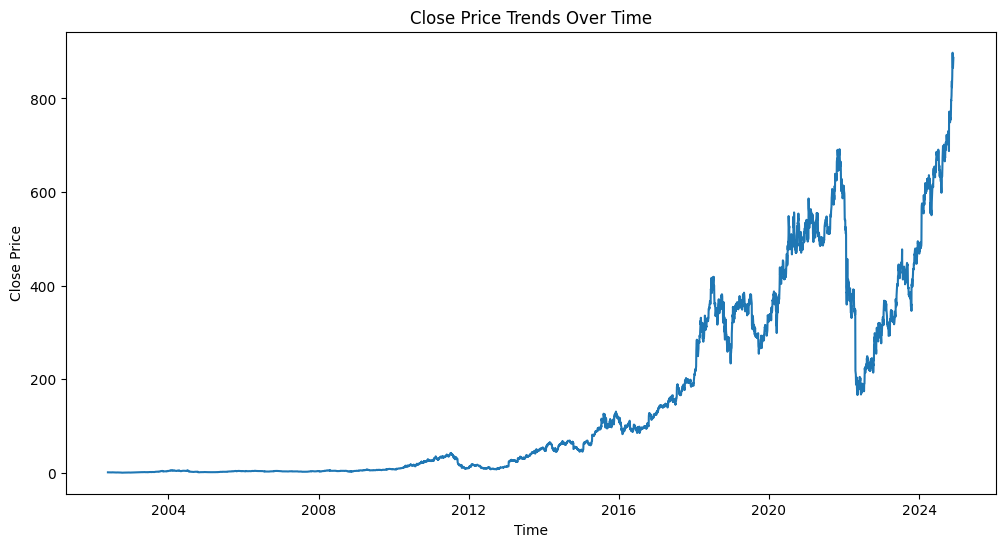

In [23]:
# Time Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=netflix_df, x= "Date", y="Close")
plt.title("Close Price Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.show()

In [24]:
# Calculate the Daily Return
netflix_df["return"] = netflix_df["Adj Close"].pct_change()

netflix_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,return
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,NaN
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,0.011343
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,-0.043684
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,-0.046297
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,-0.029125


In [26]:
# Calculate the 20-day MA, 50-day MA, 200-day MA
netflix_df["20MA"] = netflix_df["Adj Close"].rolling(window=20).mean()
netflix_df["50MA"] = netflix_df["Adj Close"].rolling(window=50).mean()
netflix_df["200MA"] = netflix_df["Adj Close"].rolling(window=200).mean()

netflix_df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,return,20MA,50MA,200MA
5665,2024-11-22,896.000000,906.000000,893.000000,897.789978,897.789978,3214000,0.000345,808.987994,755.429796,662.81620
5666,2024-11-25,902.049988,902.049988,864.219971,865.590027,865.590027,6014200,-0.035866,814.811496,758.811597,664.33755
5667,2024-11-26,867.489990,886.359985,867.250000,872.599976,872.599976,3138300,0.008098,820.469495,762.125397,665.91130
5668,2024-11-27,872.059998,880.950012,858.909973,877.340027,877.340027,2578200,0.005432,826.649496,765.862798,667.52540
5669,2024-11-29,882.169983,892.409973,876.679993,886.809998,886.809998,2027200,0.010794,833.188495,769.512598,669.06280


In [33]:
actual_days = netflix_df["Date"].nunique()  # 5670 个交易日
n_years = (netflix_df["Date"].max() - netflix_df["Date"].min()).days / 365.25
trading_days_per_year = round(actual_days / n_years, 0)

# trading_days_per_year
risk_free_rate = 0

# Annualized yield rate
avg_daily_return = netflix_df["return"].mean()
annual_return = (1 + avg_daily_return) ** trading_days_per_year -1 
# annual_return

# Annual volatility
daily_volatility = netflix_df["return"].std()
annual_volatility = daily_volatility * np.sqrt(trading_days_per_year)
# annual_volatility

# sharpe Ratio
sharpe_ratio = (avg_daily_return - risk_free_rate)/daily_volatility
# sharpe_ratio

# Calculate max drawdown
cum_return = (1 + netflix_df["return"]).cumprod()
rolling_max = cum_return.cummax()
drawdown = cum_return/rolling_max - 1
max_drawdown = drawdown.min()

max_drawdown

-0.81990426632909

In [34]:
# Calculate MACD (12day EMA, 26day EMA)
netflix_df["12EMA"] = netflix_df["Adj Close"].ewm(span=12, adjust=False).mean()
netflix_df["26EMA"] = netflix_df["Adj Close"].ewm(span=26, adjust=False).mean()
netflix_df["MACD"] = netflix_df["12EMA"] - netflix_df["26EMA"]
netflix_df["Signal_Line"] = netflix_df["MACD"].ewm(span=9, adjust=False).mean()

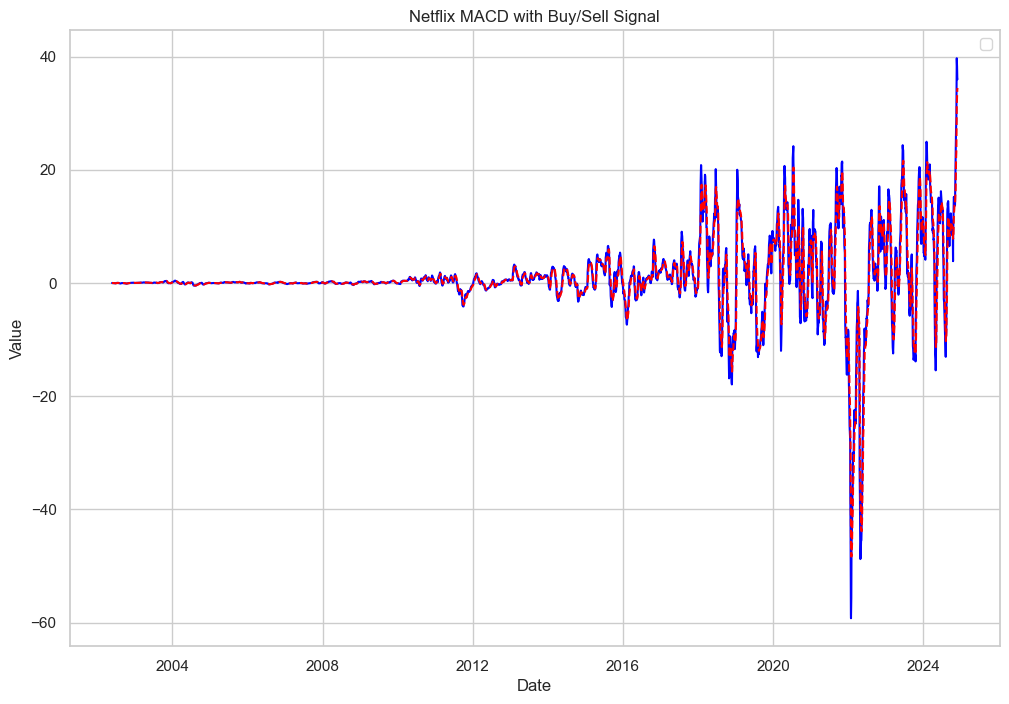

In [40]:
# Clean data
macd_df = netflix_df.dropna(subset=["MACD", "Signal_Line"])

# Find out buy signal and sell signal
buy_signal = macd_df[(macd_df["MACD"] > macd_df["Signal_Line"]) & 
                     (macd_df["MACD"].shift(1) <= macd_df["Signal_Line"].shift(1))]
sell_signal = macd_df[(macd_df["MACD"] < macd_df["Signal_Line"]) & 
                     (macd_df["MACD"].shift(1) >= macd_df["Signal_Line"].shift(1))]

# seaborn style
sns.set(style="whitegrid", palette="muted")

# Plot
plt.figure(figsize=(12, 8))

sns.lineplot(data= macd_df, x="Date", y="MACD", color="blue")
sns.lineplot(data=macd_df, x="Date", y="Signal_Line", color="red", linestyle ="--")

# plt.scatter(buy_signal["Date"], buy_signal["MACD"], marker="^", color="green", label="Buy Signal", s=70)
# plt.scatter(sell_signal["Date"], sell_signal["MACD"], marker="*", color="orange", label="Sell Signal", s=70)

plt.title("Netflix MACD with Buy/Sell Signal")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

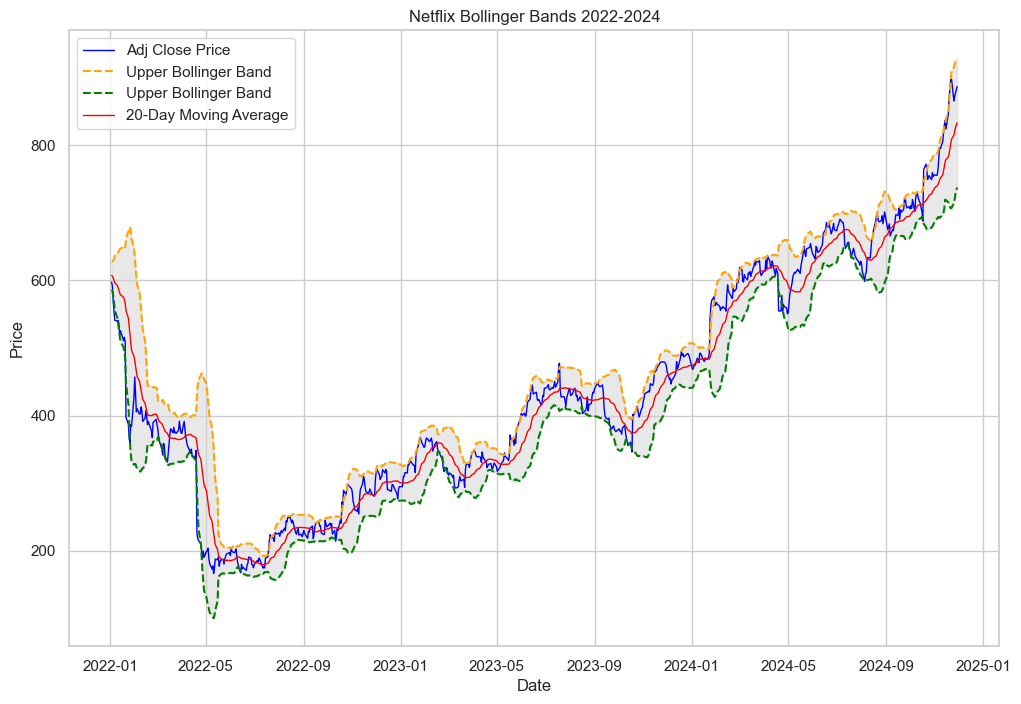

In [47]:
# Calculate Bollinger Bonds(20-day MA and 2 standard deviations)
netflix_df["Upper_Bond"] = netflix_df["20MA"] + 2 * netflix_df["Adj Close"].rolling(window=20).std()
netflix_df["Lower_Bond"] = netflix_df["20MA"] - 2 * netflix_df["Adj Close"].rolling(window=20).std()

start_year = 2022
end_year = 2024
selected_year_data = netflix_df[(netflix_df["Date"].dt.year >= start_year) & 
                                (netflix_df["Date"].dt.year <= end_year )]

# selected_year_data
# Plot
plt.figure(figsize=(12, 8))

# plot Adj close price
sns.lineplot(data=selected_year_data, x="Date", y="Adj Close", color="blue", label="Adj Close Price", linewidth=1)
# plot upper lower bolliner bands 
sns.lineplot(data=selected_year_data, x="Date", y="Upper_Bond", label="Upper Bollinger Band", color="orange", linestyle="--")
sns.lineplot(data=selected_year_data, x="Date", y="Lower_Bond", label="Upper Bollinger Band", color="green", linestyle="--")
# plot 20-day moving average
sns.lineplot(data=selected_year_data, x="Date", y="20MA", label="20-Day Moving Average", color="red", linewidth=1)

# Fill the area between upper and lower bands
plt.fill_between(
    selected_year_data["Date"],               # x: Date
    selected_year_data["Lower_Bond"],         # y1：Upper
    selected_year_data["Upper_Bond"],         # y2：Lower
    color="lightgrey",
    alpha=0.5
)

# Add title and labels
plt.title("Netflix Bollinger Bands 2022-2024")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()